<a href="https://colab.research.google.com/github/hariPrasadCoder/10-pointer-analysis/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv('final_data.csv',index_col=0)

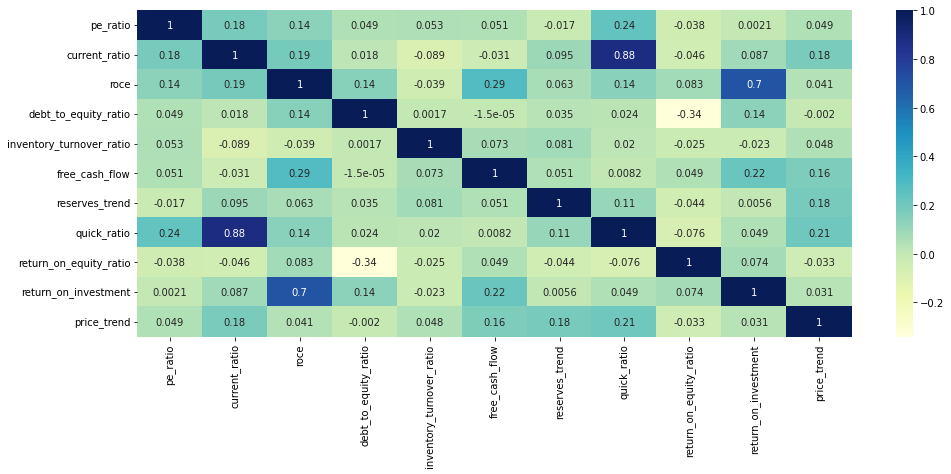

In [29]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 321
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ticker                    321 non-null    object 
 1   company_name              321 non-null    object 
 2   pe_ratio                  321 non-null    float64
 3   current_ratio             321 non-null    float64
 4   roce                      321 non-null    float64
 5   debt_to_equity_ratio      321 non-null    float64
 6   inventory_turnover_ratio  321 non-null    float64
 7   free_cash_flow            321 non-null    float64
 8   reserves_trend            321 non-null    float64
 9   quick_ratio               321 non-null    float64
 10  return_on_equity_ratio    321 non-null    float64
 11  return_on_investment      321 non-null    float64
 12  price_trend               321 non-null    float64
dtypes: float64(11), object(2)
memory usage: 35.1+ KB


In [31]:
df.describe()

,pe_ratio,current_ratio,roce,debt_to_equity_ratio,inventory_turnover_ratio,free_cash_flow,reserves_trend,quick_ratio,return_on_equity_ratio,return_on_investment,price_trend
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0000,321.000000
mean,32.580654,1.832399,0.105777,0.050623,3.269346,2941.977134,410.142056,1.377975,1.495560,inf,15.122733
std,31.810326,1.301131,0.127945,42.381312,6.789592,8221.040117,2788.517429,1.057917,14.832665,NaN,8.015074
min,0.000000,0.360000,-0.334249,-732.050000,0.170000,-19417.000000,-24097.000000,0.150000,-3.118600,-0.3754,0.000000
25%,16.800000,1.060000,0.046204,0.900000,0.870000,505.300000,-32.000000,0.730000,0.097700,0.0799,12.210180
50%,25.570000,1.450000,0.096935,1.540000,1.270000,1141.100000,331.900000,1.090000,0.195300,0.1517,13.154162
75%,38.370000,2.110000,0.167055,2.680000,2.590000,2631.000000,791.000000,1.640000,0.336400,0.2762,15.094066
max,342.000000,9.560000,0.661805,97.110000,55.290000,92953.000000,15541.500000,6.890000,249.801500,inf,100.000000


In [32]:
df.isnull().sum()

ticker                      0
company_name                0
pe_ratio                    0
current_ratio               0
roce                        0
debt_to_equity_ratio        0
inventory_turnover_ratio    0
free_cash_flow              0
reserves_trend              0
quick_ratio                 0
return_on_equity_ratio      0
return_on_investment        0
price_trend                 0
dtype: int64

In [33]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [34]:
X = df.drop(['price_trend', 'ticker', 'company_name'],axis=1)
y = df['price_trend']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)

In [50]:
regressor.intercept_

12.521840804812092

In [49]:
regressor.coef_

array([ 1.16590756e-02, -8.75039904e-01, -1.42375095e+00, -1.45683112e-03,
       -7.95561305e-02,  1.51862510e-05,  7.32698319e-05,  2.57378314e+00,
       -6.80236745e-03,  1.74361508e+00])

In [38]:
from sklearn.metrics import r2_score
multilinear_r2_score = r2_score(y_test, y_pred)
multilinear_r2_score

-0.004839542442502953

In [39]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

12.331530315620485

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [41]:
y_pred = regressor.predict(X_test)

In [43]:
rf_r2_score = r2_score(y_test, y_pred)
rf_r2_score

-0.015916679636837072